In [2]:
#library imports
import pandas as pd
import numpy as np
import os
from datetime import date
import matplotlib.pyplot as plt
from array import array


In [10]:
#get working directory
cwd = os.getcwd()
print(cwd)


C:\Users\ssi2309.60050\Downloads


In [62]:
#setting the old and new directory
old_dir = '~\\Downloads\\results_230407'
new_dir = '~\\Downloads\\results_240201' #C:\\Users\\ssi2309.60050\\OneDrive - IKNL\\Documents\\

#reading in the table counts
old_table_counts_df = pd.read_csv(f'{old_dir}\\countstables.csv')
new_table_counts_df = pd.read_csv(f'{new_dir}\\countstables.csv')

#reading in concept counts
old_concept_counts_df = pd.read_csv(f'{old_dir}\\countsconcepts.csv')
new_concept_counts_df = pd.read_csv(f'{new_dir}\\countsconcepts.csv')


In [30]:
#inspecting the dataframe
old_concept_counts_df.head(5)


,CountsID,TableName,ConceptID,ConceptName,ValueConceptID,ValueConceptName,Count
0,1,CONDITION_OCCURRENCE,0,No matching concept,NaN,NaN,12199
1,2,CONDITION_OCCURRENCE,24296,Primary malignant neoplasm of pituitary gland,NaN,NaN,2
2,3,CONDITION_OCCURRENCE,25486,Primary malignant neoplasm of islets of Langer...,NaN,NaN,64
3,4,CONDITION_OCCURRENCE,26052,Primary malignant neoplasm of larynx,NaN,NaN,28
4,5,CONDITION_OCCURRENCE,26361,Primary malignant neoplasm of pineal gland,NaN,NaN,5


In [29]:
#constructing a dataframe with old and new table counts
table_counts_df = pd.merge(old_table_counts_df, new_table_counts_df, on = "TableName", how = "inner") 

#drop irrelevant and duplicate columns
table_counts_df = table_counts_df.drop(columns = ["CountsID_x","ConceptID_x", "ValueConceptID_x", "ValueConceptID_x", 
                                                  "CountsID_y", "ConceptID_y", "ValueConceptID_y"])
#rename count columns for clarity
table_counts_df = table_counts_df.rename(columns = {"Count_x":"count_old", "Count_y":"count_new"})
table_counts_df.head(5)


,TableName,count_old,count_new
0,CDM_SOURCE,1,1
1,CONDITION_ERA,3720082,4336704
2,CONDITION_OCCURRENCE,3774055,4367805
3,DEATH,1473206,1495817
4,DEVICE_EXPOSURE,0,0


In [20]:
#old_table_counts_df
#new_table_counts_df

In [38]:
#rename count columns for clarity
old_concept_counts_df = old_concept_counts_df.rename(columns = {"Count":"count_old"})
new_concept_counts_df = old_concept_counts_df.rename(columns = {"Count":"count_new"})

#merge concept count dfs
concept_counts_df = pd.merge(old_concept_counts_df, new_concept_counts_df, how='outer', 
                             left_on=['TableName', 'ConceptID', 'ValueConceptID'], 
                             right_on=['TableName', 'ConceptID', 'ValueConceptID'])

#concept_counts_df.head(5)
concept_counts_df = concept_counts_df.drop(columns = ["ValueConceptID", "ValueConceptName_x", 
                                                      "CountsID_y", "ValueConceptName_y"])
concept_counts_df = concept_counts_df.rename(columns = {"CountsID_x":"CountsID","count_old_x":"count_old", 
                                                        "count_old_y":"count_new", 
                                                        "ConceptName_x":"ConceptName_old", 
                                                        "ConceptName_y":"ConceptName_new"})
concept_counts_df.head(5)

,CountsID,TableName,ConceptID,ConceptName_old,count_old,ConceptName_new,count_new
0,1,CONDITION_OCCURRENCE,0,No matching concept,12199,No matching concept,12199
1,2,CONDITION_OCCURRENCE,24296,Primary malignant neoplasm of pituitary gland,2,Primary malignant neoplasm of pituitary gland,2
2,3,CONDITION_OCCURRENCE,25486,Primary malignant neoplasm of islets of Langer...,64,Primary malignant neoplasm of islets of Langer...,64
3,4,CONDITION_OCCURRENCE,26052,Primary malignant neoplasm of larynx,28,Primary malignant neoplasm of larynx,28
4,5,CONDITION_OCCURRENCE,26361,Primary malignant neoplasm of pineal gland,5,Primary malignant neoplasm of pineal gland,5


In [42]:
#count the difference in days
print(old_dir)
print(new_dir)

#7th of April 2023 until 1st of Feb 2024 - use datetime calendar functionality (date and .days)
d0 = date(2023, 4, 7)
d1 = date(2024, 2, 1)
delta = d1 - d0
day_difference = delta.days
print(day_difference)


~\Downloads\results_230407
~\Downloads\results_240201
300


In [56]:
#construct a column with difference in counts 
table_counts_df["count_difference"] = table_counts_df["count_new"] - table_counts_df["count_old"]
concept_counts_df["count_difference"] = concept_counts_df["count_new"] - concept_counts_df["count_old"]
table_counts_df.head()


,TableName,count_old,count_new,count_difference
0,CDM_SOURCE,1,1,0
1,CONDITION_ERA,3720082,4336704,616622
2,CONDITION_OCCURRENCE,3774055,4367805,593750
3,DEATH,1473206,1495817,22611
4,DEVICE_EXPOSURE,0,0,0


In [91]:
table_counts_df["diff_per_day"] = table_counts_df["count_difference"]/300
table_counts_df.head(10)

,TableName,count_old,count_new,count_difference,diff_per_day
0,CDM_SOURCE,1,1,0,0.000000
1,CONDITION_ERA,3720082,4336704,616622,2055.406667
2,CONDITION_OCCURRENCE,3774055,4367805,593750,1979.166667
3,DEATH,1473206,1495817,22611,75.370000
4,DEVICE_EXPOSURE,0,0,0,0.000000
5,DOSE_ERA,0,0,0,0.000000
6,DRUG_ERA,803514,1041001,237487,791.623333
7,DRUG_EXPOSURE,1104971,1445869,340898,1136.326667
8,EPISODE,5587838,6180422,592584,1975.280000
9,EPISODE_EVENT,31262309,36674327,5412018,18040.060000


Extend the difference per day for multiple observations: obtain multiple diff_per_day observations per TableName and combine into one diff_per_day dataframe

### Below is for visualisations

In [86]:
#create a day indication
old_table_counts_df["day"] = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
new_table_counts_df["day"] = [300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300]

#restructure the df to allow groupby on counts
vis_table_counts_df = pd.concat([old_table_counts_df, new_table_counts_df]) 
vis_table_counts_df.head(32)


,CountsID,TableName,ConceptID,ValueConceptID,Count,day
0,1,CDM_SOURCE,NaN,NaN,1,0
1,2,CONDITION_ERA,NaN,NaN,3720082,0
2,3,CONDITION_OCCURRENCE,NaN,NaN,3774055,0
3,4,DEATH,NaN,NaN,1473206,0
4,5,DEVICE_EXPOSURE,NaN,NaN,0,0
5,6,DOSE_ERA,NaN,NaN,0,0
6,7,DRUG_ERA,NaN,NaN,803514,0
7,8,DRUG_EXPOSURE,NaN,NaN,1104971,0
8,9,EPISODE,NaN,NaN,5587838,0
9,10,EPISODE_EVENT,NaN,NaN,31262309,0


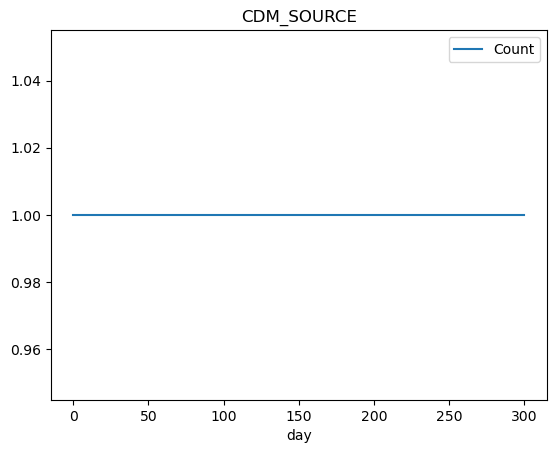

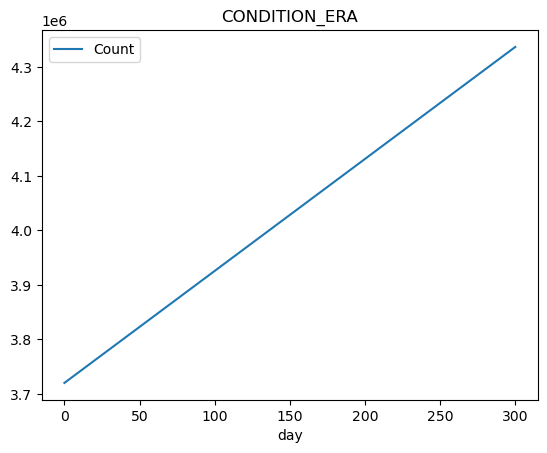

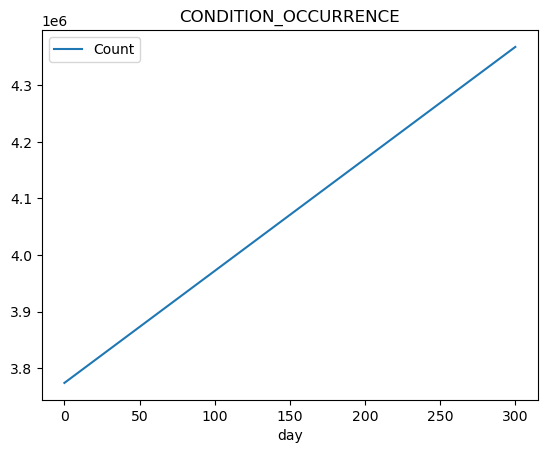

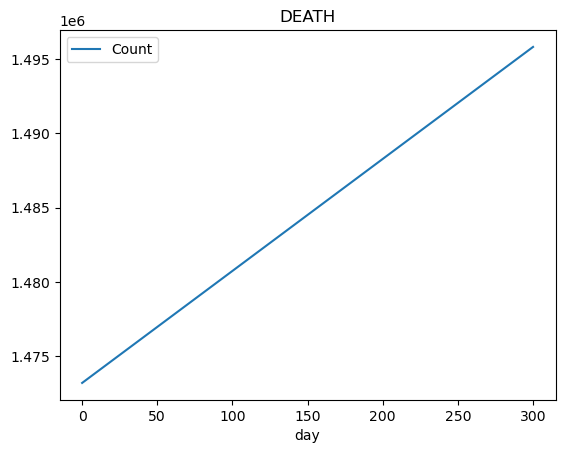

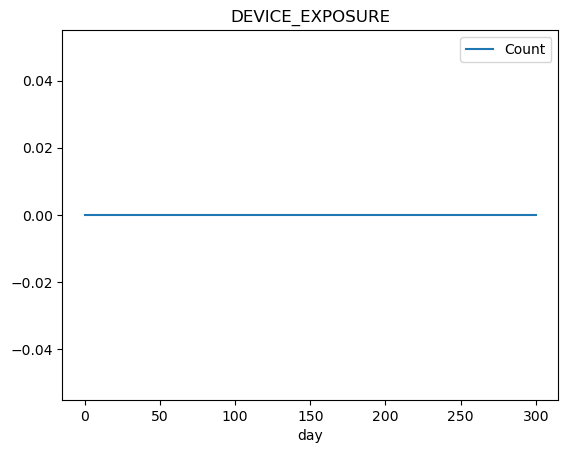

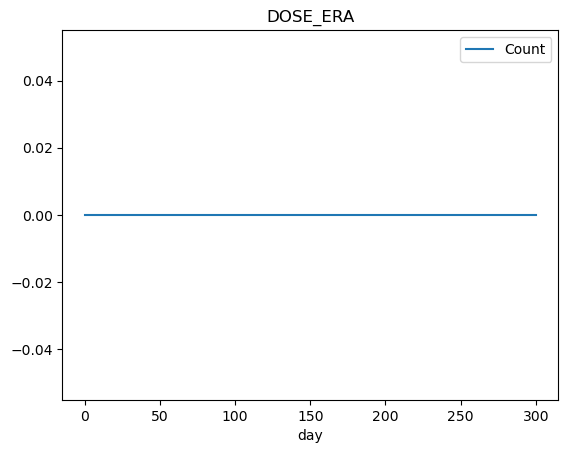

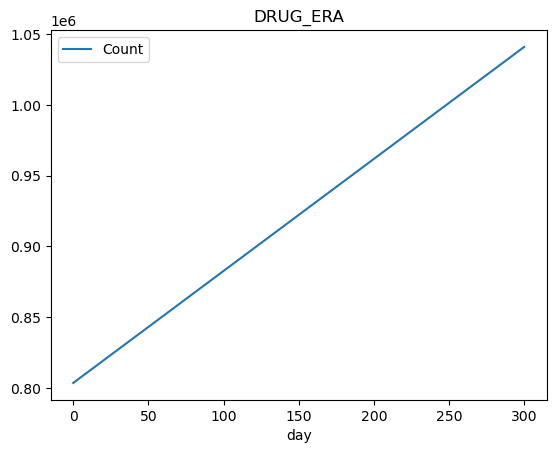

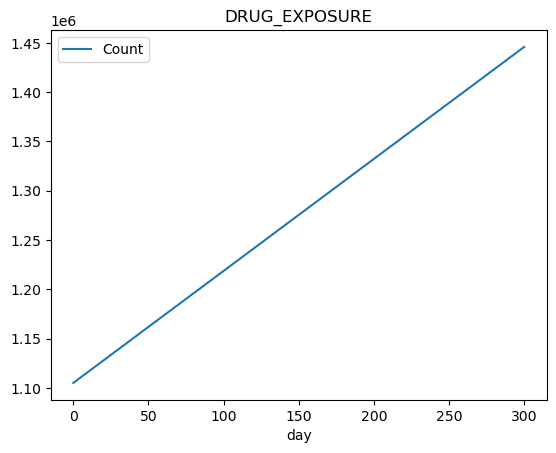

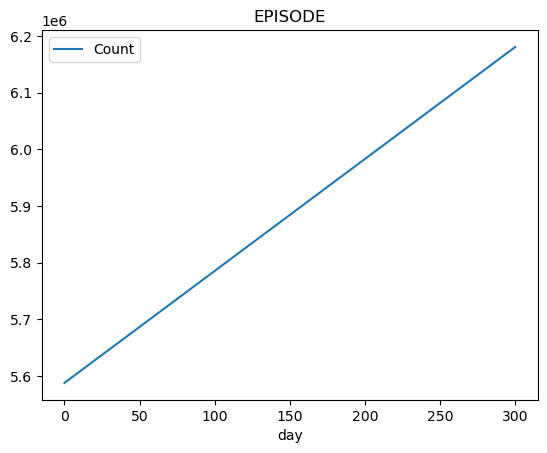

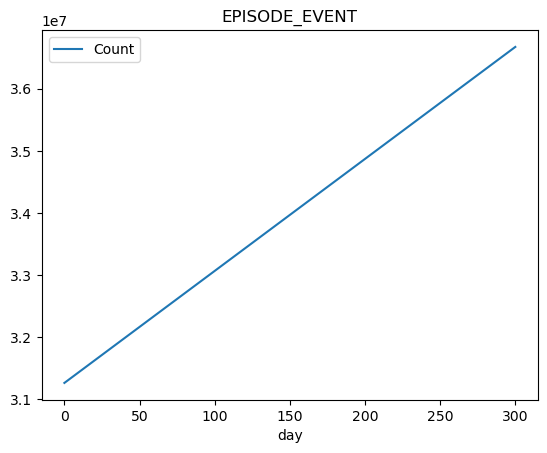

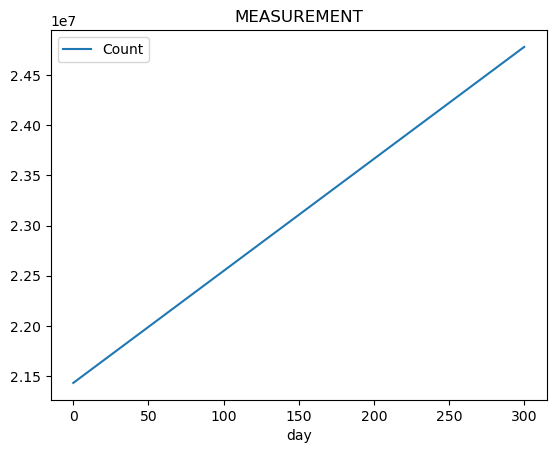

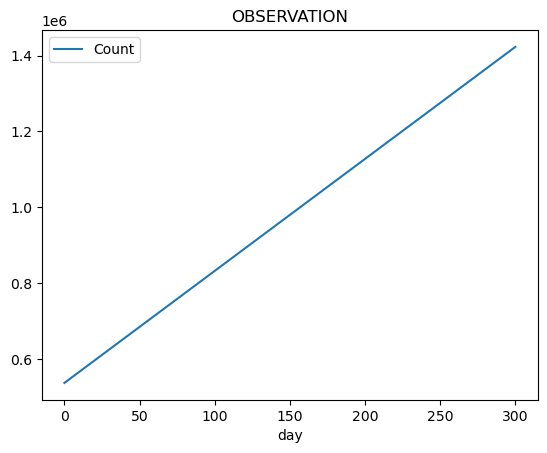

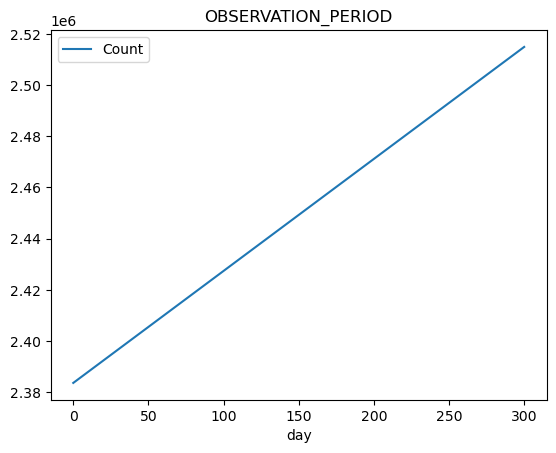

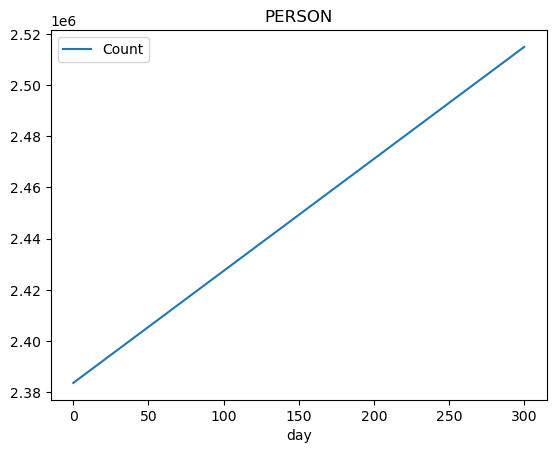

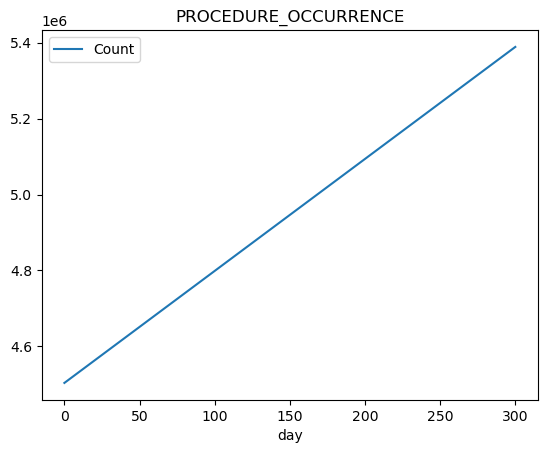

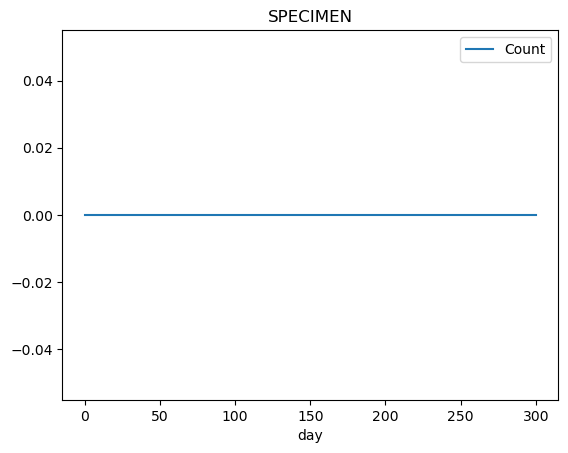

In [90]:
#visualize the table count difference considering the nr of days
#vis_table_counts_df.set_index("day", inplace=True)
#vis_table_counts_df.groupby("TableName")["Count"].plot(legend=True, xlabel="day", ylabel="Count")
#plt.show()

#Plotting one at a time
for title, group in vis_table_counts_df.groupby('TableName'):
    group.plot(x='day', y='Count', title=title)
    plt.show()


#### extend to multiple observations / differences



In [17]:
#setting the old and new directory
dir_20230407 = '~\\Downloads\\results 070423_new5'
dir_20240110 = '~\\Downloads\\results 100124' 
dir_20240112 = '~\\Downloads\\results 120124'

#reading in the table counts
april23_table_counts_df = pd.read_csv(f'{dir_20230407}\\countstables.csv')
jan24_table_counts_df = pd.read_csv(f'{dir_20240110}\\countstables.csv')
jan2412_table_counts_df = pd.read_csv(f'{dir_20240112}\\countstables.csv')

#setting df names as table_date
april23_table_counts_df.name='table_20230407'
jan24_table_counts_df.name = 'table_20240110'
jan2412_table_counts_df.name = 'table_20240112'

#reading in concept counts
april23_concept_counts_df = pd.read_csv(f'{dir_april23}\\countsconcepts.csv')
jan24_concept_counts_df = pd.read_csv(f'{dir_jan24}\\countsconcepts.csv')
jan2412_concept_counts_df = pd.read_csv(f'{dir_12jan24}\\countsconcepts.csv')

#setting df names as concept_date
april23_concept_counts_df.name='concept_20230407'
jan24_concept_counts_df.name = 'concept_20240110'
jan2412_concept_counts_df.name = 'concept_20240112'


In [14]:
#april23_table_counts_df.head()
april23_table_counts_df.name

'table_20230407'

In [6]:
april23_concept_counts_df.head()

,CountsID,TableName,ConceptID,ConceptName,ValueConceptID,ValueConceptName,Count
0,1,CONDITION_OCCURRENCE,0,No matching concept,NaN,NaN,12199
1,2,CONDITION_OCCURRENCE,24296,Primary malignant neoplasm of pituitary gland,NaN,NaN,2
2,3,CONDITION_OCCURRENCE,25486,Primary malignant neoplasm of islets of Langer...,NaN,NaN,64
3,4,CONDITION_OCCURRENCE,26052,Primary malignant neoplasm of larynx,NaN,NaN,28
4,5,CONDITION_OCCURRENCE,26361,Primary malignant neoplasm of pineal gland,NaN,NaN,5


In [15]:
#function to clean a table counts df
def clean_table_counts(df):
    #get the name of the df and drop _table_counts_df
    name_date = df.name
    count_date = name_date.replace('table_','count_')
    
    #drop irrelevant and duplicate columns
    clean_df = df.drop(columns = ["CountsID","ConceptID", "ValueConceptID"])
    
    #rename count columns for clarity
    clean_df = clean_df.rename(columns = {"Count":str(count_date)})
    
    return clean_df


In [16]:
april23_table_clean = clean_table_counts(april23_table_counts_df)
april23_table_clean.head()

,TableName,count_20230407
0,CDM_SOURCE,1
1,CONDITION_ERA,3731053
2,CONDITION_OCCURRENCE,3785291
3,DEATH,1473206
4,DEVICE_EXPOSURE,0


In [21]:
#new ones
jan24_table_clean = clean_table_counts(jan24_table_counts_df)
jan2412_table_clean = clean_table_counts(jan2412_table_counts_df)

#already read in ones
#old_dir = '~\\Downloads\\results_230407' #already have the new_5 version of this date
new_dir = '~\\Downloads\\results_240201'
feb24_table_counts_df = pd.read_csv(f'{new_dir}\\countstables.csv')
feb24_table_counts_df.name = 'table_20240201'
#cleaning
feb24_table_clean = clean_table_counts(feb24_table_counts_df)



In [22]:
#combining table count dfs
#april23_table_clean, jan24_table_clean, jan2412_table_clean

#constructing a dataframe with all table counts
table_counts_df_1 = pd.merge(april23_table_clean, jan24_table_clean, on = "TableName", how = "inner") 
table_counts_df_2 = pd.merge(table_counts_df_1, jan2412_table_clean, on = "TableName", how = "inner") 
all_table_counts_df = pd.merge(table_counts_df_2, feb24_table_clean, on = "TableName", how = "inner") 
    

In [23]:
all_table_counts_df.head()

,TableName,count_20230407,count_20240110,count_20240112,count_20240201
0,CDM_SOURCE,1,1,1,1
1,CONDITION_ERA,3731053,4256117,4256772,4336704
2,CONDITION_OCCURRENCE,3785291,4286195,4286860,4367805
3,DEATH,1473206,1490642,1490758,1495817
4,DEVICE_EXPOSURE,0,0,0,0


In [40]:
#count the days between each measurement
column_df = all_table_counts_df.columns #.get_values()
column_list = column_df.tolist()
column_list = column_list[1:5]
#column_list

#get from column names to date strings
date_list = []
for name in column_list:
    name = name.replace('count_', '')
    print(name)
    date_list.append(name)

date_list


20230407
20240110
20240112
20240201


In [53]:
#get from date strings to dates
import datetime

#get string version of dates
#datetime.datetime.strptime('',"%d%m%Y").date()
d0 = date_list[0]
d0 = datetime.datetime.strptime(str(d0),"%Y%m%d").date()
print(d0)
d1 = datetime.datetime.strptime(str(date_list[1]),"%Y%m%d").date()
print(d1)
delta1 = d1 - d0
day_difference1 = delta1.days
print(day_difference1)

d2 = datetime.datetime.strptime(str(date_list[2]),"%Y%m%d").date()
delta2 = d2 - d0
day_difference2 = delta2.days
print(day_difference2)

#continue for d3
d3 = datetime.datetime.strptime(str(date_list[3]),"%Y%m%d").date()
delta3 = d3 - d0
day_difference3 = delta3.days

#put them into a list, with the first count at day 0
day_difference0 = 0
difference_list = [day_difference0, day_difference1, day_difference2, day_difference3]
difference_list

2023-04-07
2024-01-10
278
280


[0, 278, 280, 300]

#### For visualization

april23_table_clean, jan24_table_clean, jan2412_table_clean, feb24_table_clean

In [56]:
#all dfs

#create a day indication
april23_table_clean["day"] = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
jan24_table_clean["day"] = [278,278,278,278,278,278,278,278,278,278,278,278,278,278,278,278]
jan2412_table_clean["day"] = [280,280,280,280,280,280,280,280,280,280,280,280,280,280,280,280]
feb24_table_clean["day"] = [300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300]

#change all column names with counts to only count
april23_table_clean = april23_table_clean.rename(columns = {"count_20230407":"count"})
jan24_table_clean = jan24_table_clean.rename(columns = {"count_20240110":"count"})
jan2412_table_clean = jan2412_table_clean.rename(columns = {"count_20240112":"count"})
feb24_table_clean = feb24_table_clean.rename(columns = {"count_20240201":"count"})

#restructure the df to allow groupby on counts
vis_table_counts = pd.concat([april23_table_clean, jan24_table_clean, jan2412_table_clean, feb24_table_clean]) 
#vis_table_counts = pd.concat([april23_table_clean, jan24_table_clean]) 
vis_table_counts.head(40)


,TableName,count,day
0,CDM_SOURCE,1,0
1,CONDITION_ERA,3731053,0
2,CONDITION_OCCURRENCE,3785291,0
3,DEATH,1473206,0
4,DEVICE_EXPOSURE,0,0
5,DOSE_ERA,0,0
6,DRUG_ERA,921687,0
7,DRUG_EXPOSURE,1244548,0
8,EPISODE,5684635,0
9,EPISODE_EVENT,32105326,0


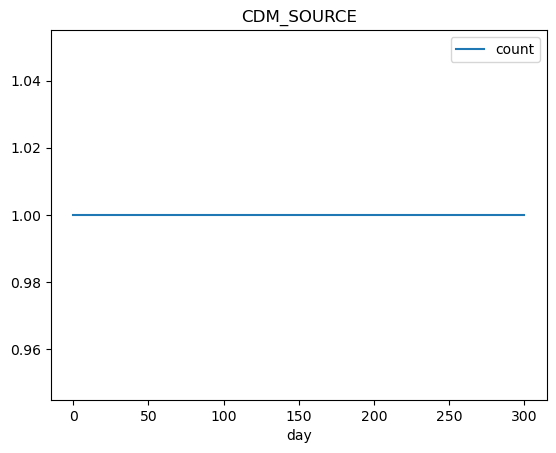

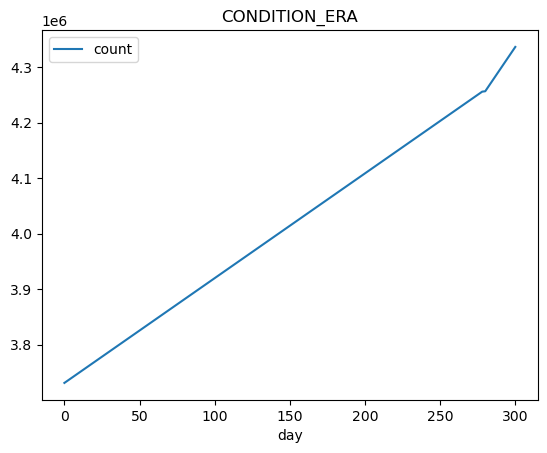

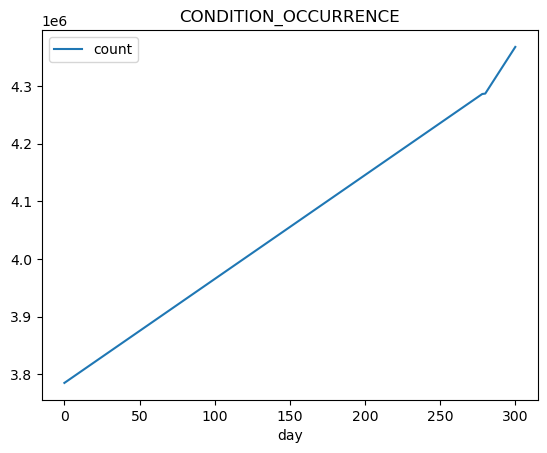

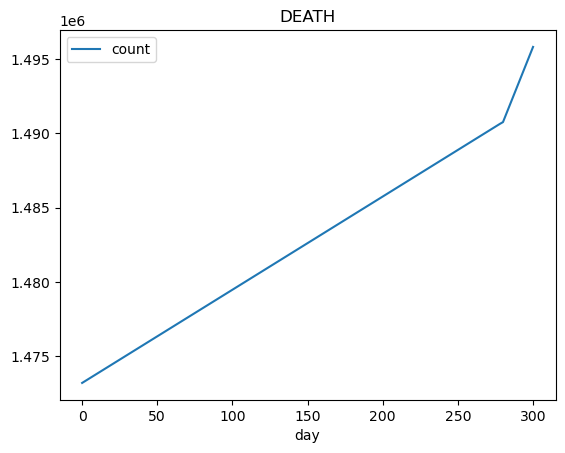

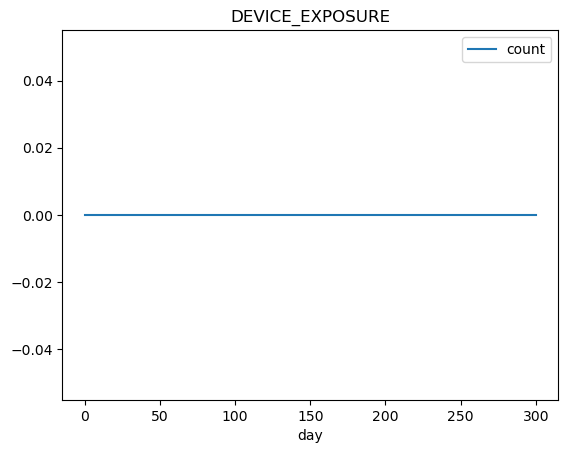

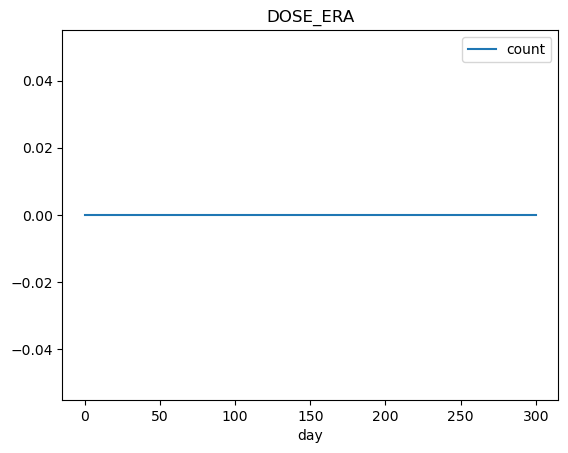

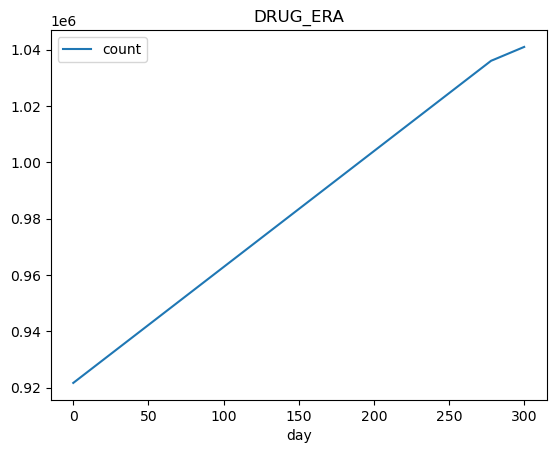

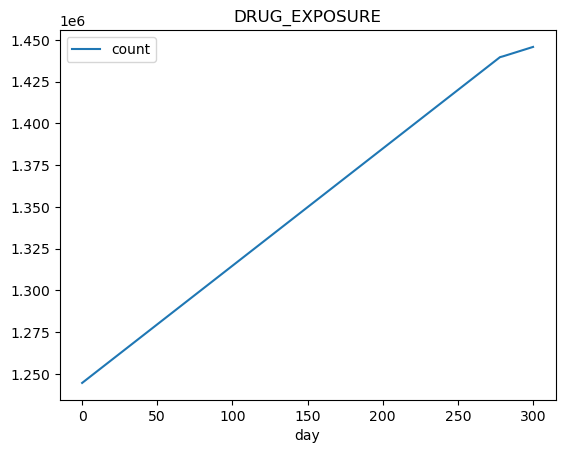

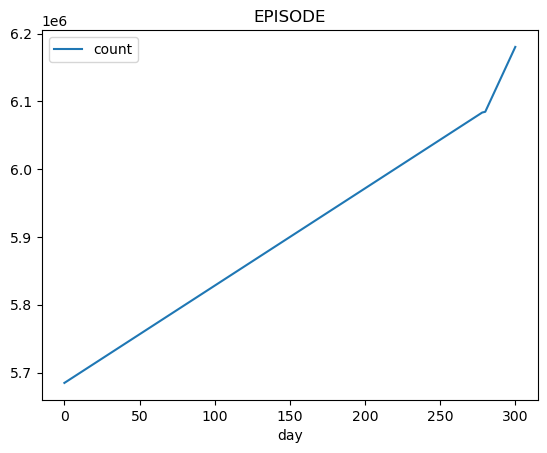

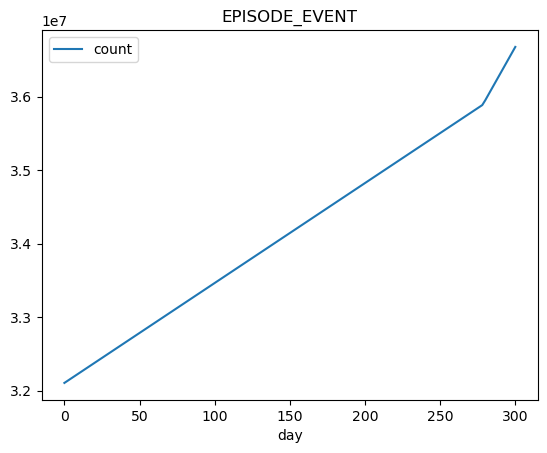

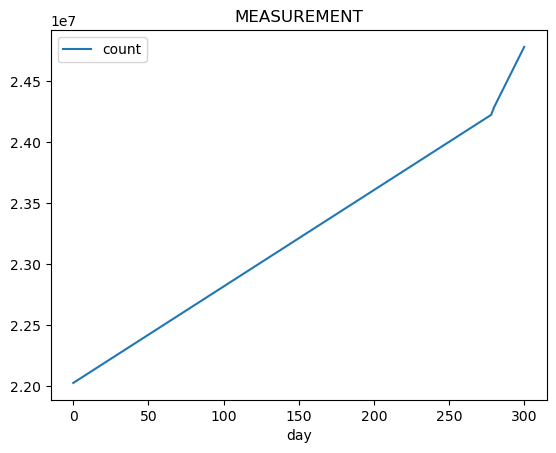

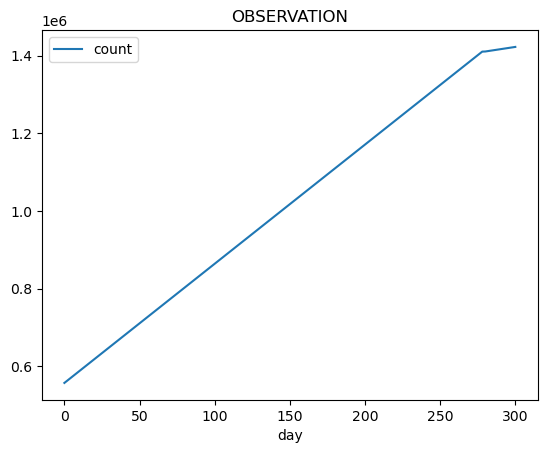

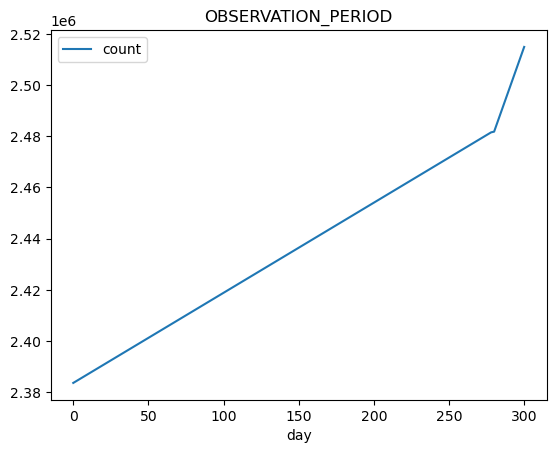

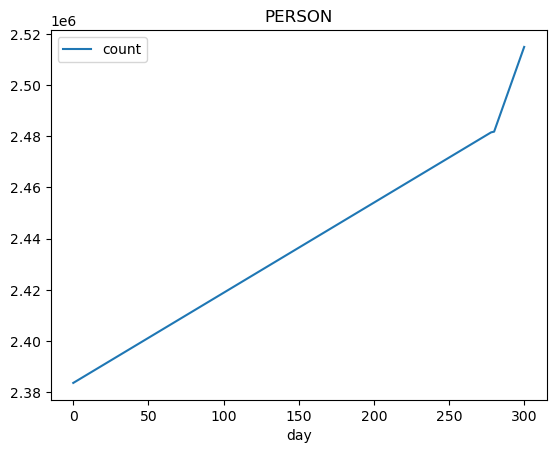

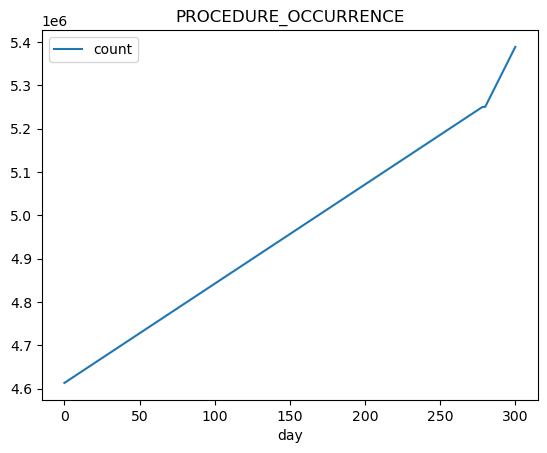

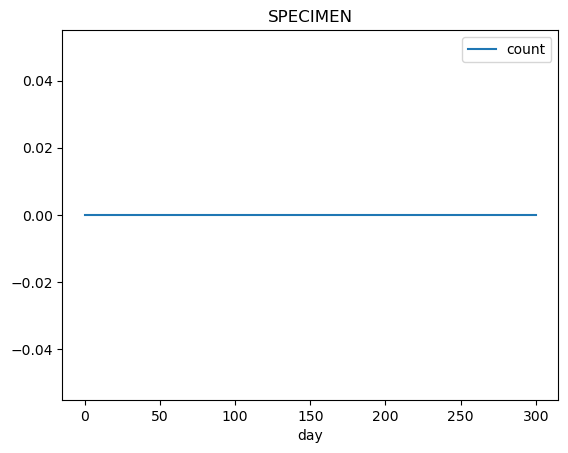

In [57]:
#Plotting one at a time
for title, group in vis_table_counts.groupby('TableName'):
    group.plot(x='day', y='count', title=title)
    plt.show()

In [67]:
vis_changing_counts = vis_table_counts.loc[~vis_table_counts["count"] == 0]
vis_changing_counts = vis_changing_counts.loc[~vis_changing_counts["count"] == 1]

#Plotting one at a time
for title, group in vis_changing_counts.groupby('TableName'):
    group.plot(x='day', y='count', title=title)
    plt.show()

In [ ]:
#concept df